# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [5]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [7]:
#your code here
spaceship.shape

(8693, 14)

In [8]:
#your code here
spaceship.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


**Check for data types**

In [9]:
#your code here
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [10]:
#your code here
spaceship.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [11]:
#your code here
spaceship_cl=spaceship.dropna()

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [12]:
#your code here
#spaceship_cl['Cabin'].unique()


In [13]:
spaceship_cl.loc[:,'Cabin']= spaceship_cl['Cabin'].str[0].str.upper()

In [14]:
#spaceship_cl['Cabin'].unique()

- Drop PassengerId and Name

In [15]:
#your code here
spaceship_cl=spaceship_cl.drop(columns = ["PassengerId","Name"])

- For non-numerical columns, do dummies.

In [16]:
spaceship_cl2 = pd.get_dummies(spaceship_cl, drop_first=False)

**Perform Train Test Split**

In [17]:
#your code here
features2=spaceship_cl2.drop(columns = ["Age"])
target2=spaceship_cl2["Age"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size = 0.20, random_state=0)

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [18]:
#your code here
from sklearn.neighbors import KNeighborsRegressor
KNN= KNeighborsRegressor(n_neighbors=10)
KNN.fit(X_train2, y_train2)

KNeighborsRegressor(n_neighbors=10)

- Evaluate your model's performance. Comment it

In [20]:
#your code here
y_pred_test_KNN = KNN.predict(X_test2)
print(f"MAE {mean_absolute_error(y_pred_test_KNN, y_test2): .2f}")
print(f"RMSE {mean_squared_error(y_pred_test_KNN, y_test2, squared=False): .2f}")
print(f"R2 score {KNN.score(X_test2, y_test2): .2f}")

MAE  10.81
RMSE  13.84
R2 score  0.09


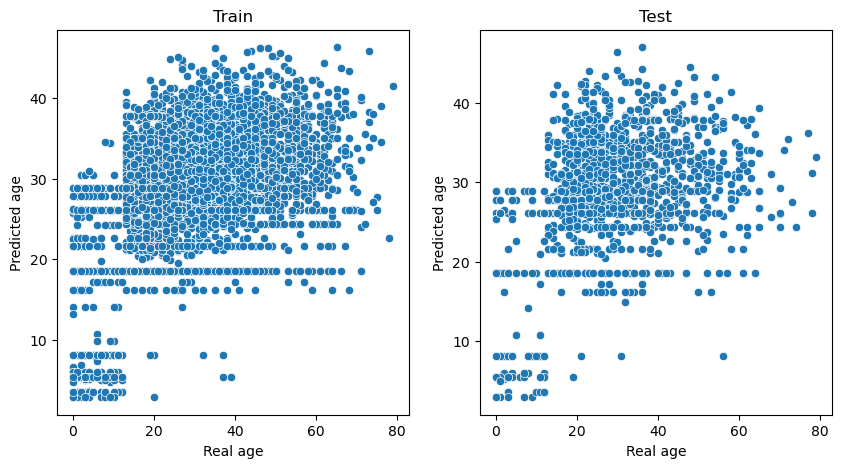

In [21]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.scatterplot(y=KNN.predict(X_train2), x=y_train2.values, ax = axes[0] )
sns.scatterplot(y=KNN.predict(X_test2), x=y_test2.values,  ax = axes[1] )
axes[0].set_title("Train")
axes[0].set_xlabel("Real age")
axes[0].set_ylabel("Predicted age")
axes[1].set_title("Test")
axes[1].set_xlabel("Real age")
axes[1].set_ylabel("Predicted age")
plt.show() # y_pred = y_real = 1 * y_real = 1 * y_real + 0